# Tulis Jawaban pada Tempat yang Telah Disediakan

Diberikan dataset yang berisi ekstraksi acak <i>gene expression</i> pasien yang memiliki berbagai jenis tumor. Karena data memiliki cukup banyak fitur, gunakan 5 fitur pertama saja, <i>link</i> : https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq#

Jika dalam menyelesaikan tugas ini Anda berkolaborasi dengan orang lain, silahkan tuliskan dengan siapa Anda berkolaborasi (pada baris ini)!

Kolaborator: Tidak Ada

Jika dalam menyelesaikan tugas ini, Anda menggunakan referensi dari halaman situs di internet, silahkan tuliskan link halaman situs tersebut (pada baris ini)!

Referensi:
    1. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
    2. https://docs.scipy.org/doc/numpy/reference/generated/numpy.asarray.html
    3. https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.sqrt.html
    4. https://docs.scipy.org/doc/numpy/reference/generated/numpy.power.html
    5. https://www.scipy-lectures.org/intro/numpy/operations.html
    6. https://www.programiz.com/python-programming/methods/list/count
    7. https://stackoverflow.com/questions/16096627/selecting-a-row-of-pandas-series-dataframe-by-integer-index
    8. https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.tolist.html
    9. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    10. https://stackabuse.com/k-means-clustering-with-scikit-learn/

## Soal

1. Lakukan <i>clustering</i> dengan menggunakan <b>k-means</b> secara manual (tidak menggunakan <i>library</i>) dengan ketentuan sebagai berikut:

   a. Jumlah <i>cluster</i> (k) adalah 5;
    
   b. Gunakan <b>Euclidean Distance</b> untuk mengukur kemiripan (<i>similarity</i>) dari data;
   
2. Lakukan <i>clustering</i> dengan  <b>k-means</b> menggunakan <b>library</b> dengan ketentuan yang sama pada soal nomor 1!

3. <i>Plotting</i> (2D) hasil <i>clustering</i> yang anda peroleh pada soal nomor 1 dan 2 dengan menggunakan <i>scatter plot</i>!

4. Berikan analisis hasil perbandingan <i>clustering</i> secara manual dan <i>clustering</i> yang menggunakan <i>library</i>!

## Jawaban

### Pengambilan Data

a) Data yang diambil adalah 5 fitur saja (gene 1, gene 2, gene 3, gene 4, dan gene 5)

In [1]:
import pandas as pd
import numpy as np
import random

fields = ['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5']
df = pd.read_csv('data.csv', usecols = fields)
df.head(15)\

,gene_1,gene_2,gene_3,gene_4,gene_5
0,2.017209,3.265527,5.478487,10.431999,0.0
1,0.592732,1.588421,7.586157,9.623011,0.0
2,3.511759,4.327199,6.881787,9.870730,0.0
3,3.663618,4.507649,6.659068,10.196184,0.0
4,2.655741,2.821547,6.539454,9.738265,0.0
5,3.467853,3.581918,6.620243,9.706829,0.0
6,1.224966,1.691177,6.572007,9.640511,0.0
7,2.854853,1.750478,7.226720,9.758691,0.0
8,3.992125,2.772730,6.546692,10.488252,0.0
9,3.642494,4.423558,6.849511,9.464466,0.0


b) Mengambil data label

In [2]:
df_label = pd.read_csv('labels.csv', usecols = ['Class'])
df_label.head(15)

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA
5,PRAD
6,KIRC
7,PRAD
8,BRCA
9,PRAD


In [3]:
df_label["Class"].value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

1. Clustering dengan menggunakan <b>k-means</b> secara manual dengan <b>k = 5</b>.

Fungsi untuk menghitung Euclidean Distance

In [4]:
def euclidean_distance (list_mean, list_data):
    pre_sqrt_list =  [0 * len(list_data)]
    for jj in range(len(list_mean)):
        mean_j = list_mean[jj]
        list_data_j = list_data[list_data.columns[jj]]
        minus_list = [jjj - mean_j for jjj in list_data_j]
        power_list = np.power(minus_list,2)
        pre_sqrt_list = pre_sqrt_list + power_list
        
    sqrt_list = np.sqrt(pre_sqrt_list)
    return sqrt_list

Fungsi untuk mengambil hasil perhitungan Euclidean Distance untuk setiap fitur(kolom)

In [5]:
def get_value_ed (k, mean_cluster_list, data):
    ed_cluster_list = []
    for i in range(k):
        cc = euclidean_distance (mean_cluster_list[i],data)
        ed_cluster_list.append(cc)
    
    ed_cluster_list = np.asarray(ed_cluster_list).T
    return ed_cluster_list

Fungsi untuk mengambil index cluster

In [6]:
def get_index_cluster (n_c, c_list):
    get_index= [i for i, ccc in enumerate(c_list) if ccc == n_c]
    return get_index

Fungsi untuk mengambil hasil keputusan cluster dan mengelompokan nilai clusternya

In [7]:
def get_cluster_decision(ed_list):
    cluster_list = []
    for kk in range(len(ed_list)):
        cluster = np.argmin(ed_list[kk])+1
        cluster_list.append(cluster)
        
    get_index_C1 = get_index_cluster(1,cluster_list)
    print 'Cluster 1 =', len(get_index_C1)
    get_index_C2 = get_index_cluster(2,cluster_list)
    print 'Cluster 2 =', len(get_index_C2)
    get_index_C3 = get_index_cluster(3,cluster_list)
    print 'Cluster 3 =', len(get_index_C3)
    get_index_C4 = get_index_cluster(4,cluster_list)
    print 'Cluster 4 =', len(get_index_C4)
    get_index_C5 = get_index_cluster(5,cluster_list)
    print 'Cluster 5 =', len(get_index_C5)
    
    return cluster_list, get_index_C1, get_index_C2, get_index_C3, get_index_C4, get_index_C5

Fungsi untuk menghitung mean untuk setiap fitur/kolom per cluster

In [8]:
def get_mean(cluster_index, value_list):
    cluster_mean = []
    for bb in range(5):
        list_perkolom = value_list[value_list.columns[bb]]
        collect_value = []
        
        for yy in cluster_index:
            temp_value = list_perkolom.iloc[[yy]].tolist()
            collect_value = collect_value + temp_value
    
        cluster_mean_kolom = np.average(collect_value)
        cluster_mean.append(cluster_mean_kolom)
        
    return cluster_mean

Fungsi untuk mengumpulkan semua mean yang telah dihitung

In [9]:
def get_all_mean (k,data,c1,c2,c3,c4,c5):
    all_data_perindex = [c1,c2,c3,c4,c5]
    all_mean = []
    for ii in range(len(all_data_perindex)):
        #code_c = 'c'+str((ii+1))
        #print code_c
        new_mean = get_mean(all_data_perindex[ii], df)
        all_mean.append(new_mean)
    return all_mean

Mengambil nilai centroid (mean pertama) secara random

In [10]:
def getrandom(dflist):
    random.seed(2)
    list_random = random.sample(dflist,5)
    return list_random

rd_list1 = getrandom(df['gene_1'])
print 'Centroid dari kolom 1 sebanyak 5 mean =\n', rd_list1
rd_list2 = (getrandom(df['gene_2']))
print '\nCentroid dari kolom 2 sebanyak 5 mean =\n', rd_list2
rd_list3 = getrandom(df['gene_3'])
print '\nCentroid dari kolom 3 sebanyak 5 mean =\n', rd_list3
rd_list4= getrandom(df['gene_4'])
print '\nCentroid dari kolom 4 sebanyak 5 mean =\n', rd_list4
rd_list5 = getrandom(df['gene_5'])
print '\nCentroid dari kolom 5 sebanyak 5 mean =\n', rd_list5

Centroid dari kolom 1 sebanyak 5 mean =
[1.9239097947200001, 4.30158033069, 3.0920551756599997, 3.65253238508, 2.9198358342799997]

Centroid dari kolom 2 sebanyak 5 mean =
[1.36558056583, 2.49026204879, 2.21032651673, 3.6666543500300004, 3.6034186412900002]

Centroid dari kolom 3 sebanyak 5 mean =
[6.46791361816, 7.0296958176499995, 5.88484941835, 6.902881551749999, 7.6605236546399995]

Centroid dari kolom 4 sebanyak 5 mean =
[9.176499807110002, 9.63666811823, 10.1652336325, 9.86190110082, 9.74936498241]

Centroid dari kolom 5 sebanyak 5 mean =
[0.0, 0.0, 0.0, 0.0, 0.0]


Menggabungkan semua mean menjadi satu array

In [11]:
centroid = np.asarray([rd_list1,rd_list2,rd_list3,rd_list4,rd_list5]).T

centroid

array([[ 1.92390979,  1.36558057,  6.46791362,  9.17649981,  0.        ],
       [ 4.30158033,  2.49026205,  7.02969582,  9.63666812,  0.        ],
       [ 3.09205518,  2.21032652,  5.88484942, 10.16523363,  0.        ],
       [ 3.65253239,  3.66665435,  6.90288155,  9.8619011 ,  0.        ],
       [ 2.91983583,  3.60341864,  7.66052365,  9.74936498,  0.        ]])

Menghitung cluster pertama berdasarkan nilai centroid

In [12]:
k= 5 
cluster_mean_list = centroid

ed_value_list = get_value_ed(k, cluster_mean_list, df)
cluster_list, index_C1, index_C2, index_C3, index_C4, index_C5 = get_cluster_decision(ed_value_list)
#print 'Panjang cluster', (cluster_list)
cluster_mean_list = get_all_mean(k, df, index_C1, index_C2, index_C3, index_C4, index_C5)
cluster_list_old = cluster_list

Cluster 1 = 158
Cluster 2 = 65
Cluster 3 = 139
Cluster 4 = 306
Cluster 5 = 133


Melakukan iterasi hingga data convergen

In [13]:
iterasi = 0
convergen = 1

while convergen != 0:    
    iterasi = iterasi+1
    print '\nIterasi ke', iterasi
    ed_value_list = get_value_ed(k, cluster_mean_list, df)
    cluster_list, index_C1, index_C2, index_C3, index_C4, index_C5 = get_cluster_decision(ed_value_list)
    #print type(cluster_list)
    #print cmp(cluster_list_old,cluster_list)    
    convergen = cmp(cluster_list_old,cluster_list)
    
    if convergen != 0:
        cluster_mean_list = get_all_mean(k, df, index_C1, index_C2, index_C3, index_C4, index_C5)
        cluster_list_old = cluster_list
    else:
        cluster_mean_list = get_all_mean(k, df, index_C1, index_C2, index_C3, index_C4, index_C5)
        print '============================================'
        print '= Hasil sudah CONVERGEN pada iterasi ke', iterasi, '='
        print '============================================'
        break;


Iterasi ke 1
Cluster 1 = 146
Cluster 2 = 98
Cluster 3 = 168
Cluster 4 = 257
Cluster 5 = 132

Iterasi ke 2
Cluster 1 = 135
Cluster 2 = 119
Cluster 3 = 174
Cluster 4 = 227
Cluster 5 = 146

Iterasi ke 3
Cluster 1 = 126
Cluster 2 = 138
Cluster 3 = 181
Cluster 4 = 208
Cluster 5 = 148

Iterasi ke 4
Cluster 1 = 117
Cluster 2 = 157
Cluster 3 = 182
Cluster 4 = 193
Cluster 5 = 152

Iterasi ke 5
Cluster 1 = 108
Cluster 2 = 168
Cluster 3 = 184
Cluster 4 = 182
Cluster 5 = 159

Iterasi ke 6
Cluster 1 = 106
Cluster 2 = 180
Cluster 3 = 182
Cluster 4 = 174
Cluster 5 = 159

Iterasi ke 7
Cluster 1 = 106
Cluster 2 = 188
Cluster 3 = 183
Cluster 4 = 169
Cluster 5 = 155

Iterasi ke 8
Cluster 1 = 106
Cluster 2 = 194
Cluster 3 = 185
Cluster 4 = 164
Cluster 5 = 152

Iterasi ke 9
Cluster 1 = 105
Cluster 2 = 198
Cluster 3 = 189
Cluster 4 = 160
Cluster 5 = 149

Iterasi ke 10
Cluster 1 = 104
Cluster 2 = 198
Cluster 3 = 192
Cluster 4 = 157
Cluster 5 = 150

Iterasi ke 11
Cluster 1 = 104
Cluster 2 = 198
Cluster 3 = 1

Dari perhitungan clustering dengan menggunakan <b>k-means</b> secara manual dengan <b>k = 5</b> diperoleh data convergen setelah iterasi ke <b>15</b>. Dengan nilai center (mean terakhir),  

In [14]:
np.asarray(cluster_mean_list)

array([[0.84988663, 2.14618611, 6.51654484, 9.93826866, 0.        ],
       [3.79312536, 3.19848145, 6.71337945, 9.73556323, 0.        ],
       [2.64285725, 2.09647555, 6.47704325, 9.81747806, 0.        ],
       [4.32372412, 4.51616781, 6.76821365, 9.64831413, 0.        ],
       [2.6192918 , 3.45680097, 7.1481931 , 9.99408277, 0.        ]])

Hasil kelas cluster-nya sebagai berikut,

In [15]:
print (cluster_list)

[3, 1, 4, 4, 3, 2, 1, 3, 2, 4, 2, 3, 2, 5, 3, 5, 2, 2, 1, 4, 3, 2, 1, 3, 2, 2, 5, 1, 2, 4, 3, 5, 1, 1, 4, 5, 2, 4, 1, 1, 2, 5, 4, 2, 2, 3, 1, 2, 2, 4, 2, 4, 3, 2, 3, 5, 1, 2, 5, 5, 1, 2, 2, 2, 5, 2, 4, 2, 3, 5, 2, 1, 5, 2, 2, 2, 3, 1, 5, 5, 2, 5, 4, 3, 3, 4, 5, 3, 1, 5, 5, 2, 3, 1, 3, 4, 5, 3, 5, 3, 2, 4, 3, 1, 4, 4, 1, 4, 3, 4, 1, 2, 3, 4, 5, 3, 3, 5, 3, 3, 3, 3, 2, 5, 2, 2, 3, 3, 1, 5, 5, 5, 5, 3, 3, 1, 2, 5, 3, 2, 4, 4, 2, 3, 4, 5, 1, 2, 4, 4, 2, 4, 5, 2, 1, 3, 3, 2, 5, 4, 5, 4, 3, 5, 2, 3, 5, 1, 4, 3, 1, 5, 3, 5, 3, 1, 1, 5, 1, 2, 5, 1, 3, 4, 5, 4, 2, 4, 5, 5, 2, 2, 3, 4, 2, 3, 1, 4, 1, 4, 1, 2, 2, 5, 1, 2, 1, 4, 1, 4, 3, 5, 4, 1, 2, 3, 2, 2, 4, 3, 3, 4, 3, 3, 5, 4, 3, 4, 3, 3, 2, 2, 4, 3, 1, 2, 3, 5, 1, 3, 3, 3, 3, 2, 4, 4, 1, 3, 2, 5, 5, 4, 3, 2, 4, 3, 3, 4, 2, 2, 3, 2, 3, 4, 5, 4, 4, 3, 1, 1, 3, 3, 5, 1, 3, 2, 2, 4, 3, 1, 2, 4, 1, 2, 5, 2, 3, 2, 3, 3, 3, 3, 1, 2, 5, 3, 4, 2, 3, 4, 2, 3, 2, 1, 4, 2, 2, 1, 2, 2, 2, 2, 4, 2, 1, 3, 4, 2, 2, 2, 5, 2, 3, 3, 2, 2, 3, 3, 2, 2, 4, 5, 3, 

2. Clustering dengan k-means menggunakan <b>library</b> dengan ketentuan yang sama pada soal nomor 1

    a) Clustering dengan menggunakan library dengan nilai centroid yang digunakan sama dengan pada soal nomor 1

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k, init=centroid).fit(df)
kmeans

KMeans(algorithm='auto', copy_x=True,
    init=array([[ 1.92391,  1.36558,  6.46791,  9.1765 ,  0.     ],
       [ 4.30158,  2.49026,  7.0297 ,  9.63667,  0.     ],
       [ 3.09206,  2.21033,  5.88485, 10.16523,  0.     ],
       [ 3.65253,  3.66665,  6.90288,  9.8619 ,  0.     ],
       [ 2.91984,  3.60342,  7.66052,  9.74936,  0.     ]]),
    max_iter=300, n_clusters=5, n_init=10, n_jobs=1,
    precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

Convergen pada iterasi,

In [17]:
kmeans.n_iter_

15

Jumlah data pada tiap cluster

In [18]:
get_index_C1_lib = get_index_cluster(0,kmeans.labels_.tolist())
print 'Cluster 1 =', len(get_index_C1_lib)
get_index_C2_lib = get_index_cluster(1,kmeans.labels_.tolist())
print 'Cluster 2 =',len(get_index_C2_lib)
get_index_C3_lib = get_index_cluster(2,kmeans.labels_.tolist())
print 'Cluster 3 =',len(get_index_C3_lib)
get_index_C4_lib = get_index_cluster(3,kmeans.labels_.tolist())
print 'Cluster 4 =',len(get_index_C4_lib)
get_index_C5_lib = get_index_cluster(4,kmeans.labels_.tolist())
print 'Cluster 5 =',len(get_index_C5_lib)

Cluster 1 = 105
Cluster 2 = 198
Cluster 3 = 194
Cluster 4 = 154
Cluster 5 = 150


    b) Clustering dengan menggunakan library dengan nilai centroid menggunakan metode random dari data dan random state 5

In [19]:
kmeans_b = KMeans(n_clusters=k, init='random', random_state=5).fit(df)
kmeans_b

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [20]:
kmeans_b.n_iter_

13

In [21]:
get_index_C1_lib_b = get_index_cluster(0,kmeans_b.labels_.tolist())
print 'Cluster 1 =', len(get_index_C1_lib_b)
get_index_C2_lib_b = get_index_cluster(1,kmeans_b.labels_.tolist())
print 'Cluster 2 =',len(get_index_C2_lib_b)
get_index_C3_lib_b = get_index_cluster(2,kmeans_b.labels_.tolist())
print 'Cluster 3 =',len(get_index_C3_lib_b)
get_index_C4_lib_b = get_index_cluster(3,kmeans_b.labels_.tolist())
print 'Cluster 4 =',len(get_index_C4_lib_b)
get_index_C5_lib_b = get_index_cluster(4,kmeans_b.labels_.tolist())
print 'Cluster 5 =',len(get_index_C5_lib_b)

Cluster 1 = 115
Cluster 2 = 234
Cluster 3 = 79
Cluster 4 = 184
Cluster 5 = 189


    c) Clustering dengan menggunakan library dengan nilai centroid menggunakan metode k-means++ dan random state 5

In [22]:
kmeans_c = KMeans(n_clusters=k, init='k-means++', random_state=5).fit(df)
kmeans_c

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [23]:
kmeans_c.n_iter_

14

In [24]:
get_index_C1_lib_c = get_index_cluster(0,kmeans_c.labels_.tolist())
print 'Cluster 1 =', len(get_index_C1_lib_c)
get_index_C2_lib_c = get_index_cluster(1,kmeans_c.labels_.tolist())
print 'Cluster 2 =',len(get_index_C2_lib_c)
get_index_C3_lib_c = get_index_cluster(2,kmeans_c.labels_.tolist())
print 'Cluster 3 =',len(get_index_C3_lib_c)
get_index_C4_lib_c = get_index_cluster(3,kmeans_c.labels_.tolist())
print 'Cluster 4 =',len(get_index_C4_lib_c)
get_index_C5_lib_c = get_index_cluster(4,kmeans_c.labels_.tolist())
print 'Cluster 5 =',len(get_index_C5_lib_c)

Cluster 1 = 152
Cluster 2 = 185
Cluster 3 = 142
Cluster 4 = 107
Cluster 5 = 215


3. Plotting (2D) hasil clustering yang diperoleh pada soal nomor 1 dan 2 dengan menggunakan scatter plot

    a) Plotting data asli sebelum di clustering

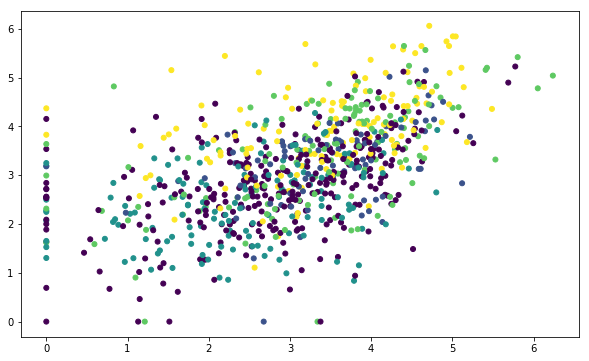

In [32]:
from matplotlib import pyplot as plt

data_plot = df.values
#print type(data_plot)

# Change categorical data to number 0-4
df_label["Class"] = pd.Categorical(df_label["Class"])
df_label["Class"] = df_label["Class"].cat.codes

label_plot = np.concatenate((df_label.values), axis=None)
#print (label_plot.shape)

plt.figure(figsize=(10, 6))
plt.scatter(data_plot[:,0], data_plot[:,1], c=label_plot, s=25, alpha=1)
plt.show()

    b) Plotting data clustering dari perhitungan manual

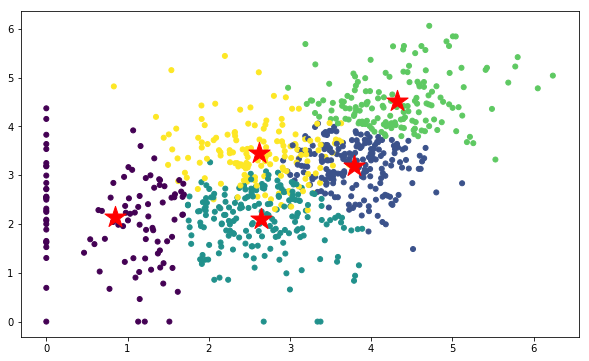

In [26]:
y_kmeans_manual = cluster_list

plt.figure(figsize=(10, 6))
plt.scatter(data_plot[:,0], data_plot[:,1], c=y_kmeans_manual, s=25)
centers_manual = np.asarray(cluster_mean_list)
#print type(centers_manual)
plt.scatter(centers_manual[:, 0], centers_manual[:, 1], c='red', s=500, marker = "*");
plt.show()

    c) Plotting data clustering dengan library yang bagian a (nilai centroid sama dengan centroid manual)

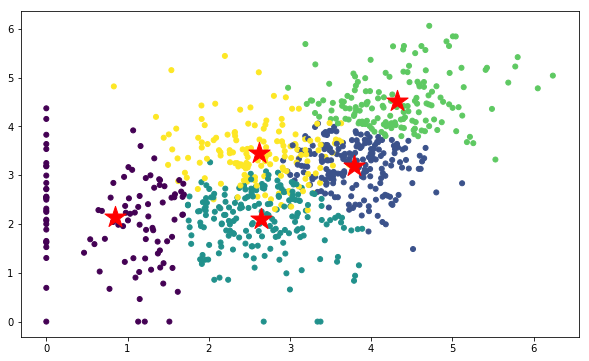

In [33]:
y_kmeans = kmeans.predict(df)
#print y_kmeans
#print kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(data_plot[:,0], data_plot[:,1], c=y_kmeans, s=25)
centers = kmeans.cluster_centers_
#print type(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=500, marker = "*");
plt.show()

    c) Plotting data clustering dengan library yang bagian b (random)

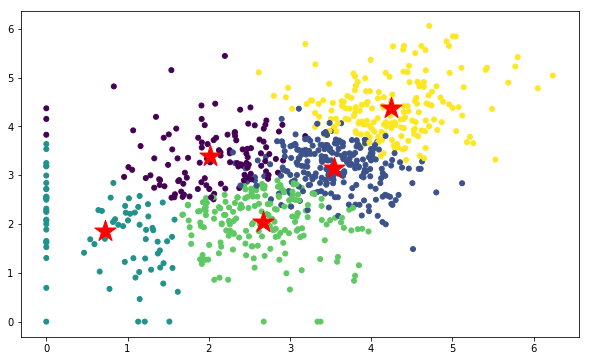

In [29]:
y_kmeans_b = kmeans_b.predict(df)
#print y_kmeans_b
#print kmeans_b.labels_

plt.figure(figsize=(10, 6))
plt.scatter(data_plot[:,0], data_plot[:,1], c=y_kmeans_b, s=25)
centers_b = kmeans_b.cluster_centers_
#print type(centers_b)
plt.scatter(centers_b[:, 0], centers_b[:, 1], c='red', s=500, marker = "*");
plt.show()

    d) Plotting data clustering dengan library yang bagian c (k-means++)

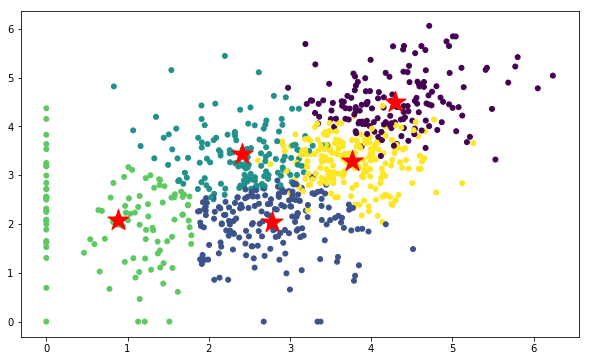

In [30]:
y_kmeans_c = kmeans_c.predict(df)
#print y_kmeans_c
#print kmeans_c.labels_

plt.figure(figsize=(10, 6))
plt.scatter(data_plot[:,0], data_plot[:,1], c=y_kmeans_c, s=25)
centers_c = kmeans_c.cluster_centers_
#print type(centers_c)
plt.scatter(centers_c[:, 0], centers_c[:, 1], c='red', s=500, marker = "*");
plt.show()

4. Analisis hasil perbandingan clustering secara manual dan clustering yang menggunakan library

Dari hasil yang diperoleh dapat disimpulkan penentuan nilai centroid mempengaruhi hasil clustering.

Pada pencarian clustering dengan menggunakan library dimana centroid yang digunakan sama dengan yang perhitungan manual, hasil clustering yang diperoleh sama yaitu convergen pada iterasi ke 15 dan jumlah data tiap clusternya sama.

Sedangkan clustering dengan menggunakan library yang penentuan centroid menggunakan metode k-means++ dimana metode ini bertujuan untuk menentukan nilai centroid yang terbaik, hasilnya berbeda dari yang secara manual. Pada iterasi yang ke 14 sudah convergen.

Kemudian clustering dengan menggunakan library yang menentukan centroid random dari data, hasilnya juga berbeda dari yang secara manual dan kmeans++. Setelah iterasi ke 13 data sudah convergen dan tampak ada perbedaan pada hasil clustering datanya.

Untuk selanjutnya jika ingin mengevaluasi dan mengetahui hasil clustering mana yang terbaik dapat dilakukan cluster validation secara internal.